In [3]:
pip install h5py matplotlib

  Using cached matplotlib-3.9.0-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.52.4-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (161 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (6.4 kB)
  Using cached pillow-10.3.0-cp311-cp311-manylinux_2_28_aarch64.whl.metadata (9.2 kB)
Using cached matplotlib-3.9.0-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (8.2 MB)
Using cached contourpy-1.2.1-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (302 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.52.4-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (4.9 MB)
Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17

Datasets in the HDF5 file:
AGB_CO


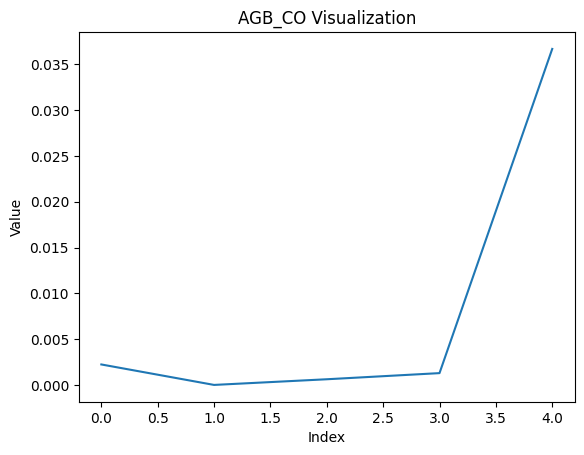

AGB_PY
Error: x and y can be no greater than 2D, but have shapes (1,) and (1, 11, 17)


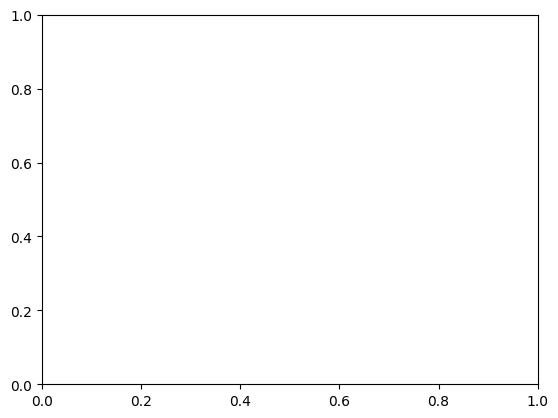

In [5]:
import h5py
import matplotlib.pyplot as plt

def plot_hdf5(file_path):
    try:
        with h5py.File(file_path, 'r') as hdf_file:
            dataset_names = list(hdf_file.keys())
            print("Datasets in the HDF5 file:")
            for dataset_name in dataset_names:
                print(dataset_name)
                dataset = hdf_file[dataset_name][:]
            
                # Plotting the data
                plt.plot(dataset)
                plt.xlabel('Index')
                plt.ylabel('Value')
                plt.title(f'{dataset_name} Visualization')
                plt.show()
                #break
    except Exception as e:
        print("Error:", e)

# Example usage
file_path = 'wxhz/analysis-E-2000-01-00-000000-g01.h5'
plot_hdf5(file_path)